<a href="https://colab.research.google.com/github/Nataliaa1994/Example-regression/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
sklearn.__version__

'0.22.2.post1'

In [82]:
from google.colab import files

In [83]:
uploaded=files.upload()

Saving Employee Satisfaction Index.csv to Employee Satisfaction Index (2).csv


In [84]:
import io
raw_data = pd.read_csv(io.StringIO(uploaded['Employee Satisfaction Index.csv'].decode('utf-8')))
raw_data = pd.read_csv('Employee Satisfaction Index.csv')

In [85]:
raw_data.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [86]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,249.500,144.481833,0.0,124.75,249.5,374.25,499.0
age,500.0,38.610,9.438648,23.0,30.00,39.0,47.00,54.0
job_level,500.0,3.032,1.423738,1.0,2.00,3.0,4.00,5.0
rating,500.0,3.072,1.425089,1.0,2.00,3.0,4.00,5.0
onsite,500.0,0.466,0.499342,0.0,0.00,0.0,1.00,1.0
awards,500.0,4.538,2.853215,0.0,2.00,5.0,7.00,9.0
certifications,500.0,0.496,0.500485,0.0,0.00,0.0,1.00,1.0
salary,500.0,50416.056,23671.392661,24076.0,29805.00,42419.0,65715.00,86750.0
satisfied,500.0,0.526,0.499824,0.0,0.00,1.0,1.00,1.0


In [87]:
nulls_summary = pd.DataFrame(raw_data.isnull().any(), columns=['Nulls'])   
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(raw_data.isnull().sum())   
nulls_summary['Num_of_nulls [%]'] = round((raw_data.isnull().mean()*100),2)   
print(nulls_summary) 

                  Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Unnamed: 0        False                   0               0.0
emp_id            False                   0               0.0
age               False                   0               0.0
Dept              False                   0               0.0
location          False                   0               0.0
education         False                   0               0.0
recruitment_type  False                   0               0.0
job_level         False                   0               0.0
rating            False                   0               0.0
onsite            False                   0               0.0
awards            False                   0               0.0
certifications    False                   0               0.0
salary            False                   0               0.0
satisfied         False                   0               0.0


In [36]:
raw_data['education'].value_counts()

PG    254
UG    246
Name: education, dtype: int64

In [37]:
raw_data['recruitment_type'].value_counts()

On-Campus             133
Referral              131
Walk-in               128
Recruitment Agency    108
Name: recruitment_type, dtype: int64

In [ ]:
raw_data['location'].value_counts()

City      259
Suburb    241
Name: location, dtype: int64

In [ ]:
raw_data['Dept'].value_counts()

Purchasing    109
HR            106
Technology     98
Marketing      95
Sales          92
Name: Dept, dtype: int64

In [88]:
raw_data.set_index(['emp_id'])

,Unnamed: 0,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
emp_id,,,,,,,,,,,,,
HR8270,0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
TECH1860,1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
TECH6390,2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
SAL6191,3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
HR6734,4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HR5330,495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
TECH9010,496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
MKT7801,497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1


In [89]:
def create_np_array_from_input_list(input_list,output_type):
    np_target = []
    
    entries = []
    entries_idx = []
    for entry in input_list:
        duplicate = 0
        for active_entry in entries:
            if entry == active_entry:
                duplicate = 1
        
        if duplicate == 0:
            entries.append(entry)
        
        no_entries = len(entries)
        
    for i in range(0,no_entries):
        entries_idx.append(i)
        
    for entry in input_list:
        for i in range(0,no_entries):
            if entry == entries[i]:
                np_target.append(entries_idx[i])
                
    if output_type == 'numpy':
        return(np_target)
    elif output_type == 'categories':
        return(entries)
    else:
        raise ValueError('output_type must be \'numpy\' or \'categories\'')

In [90]:
np_data = create_np_array_from_input_list(raw_data['education'],'numpy')
educ = create_np_array_from_input_list(raw_data['education'],'categories')

In [ ]:
educ

['PG', 'UG']

In [91]:
data_copy = raw_data.copy()

for i in range(0,len(np_data)):
    data_copy.at[i,'education'] = np_data[i]


data_copy

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,0,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,0,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,1,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,0,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,1,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,0,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,1,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,0,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,1,On-Campus,2,1,1,1,1,29805,0


In [92]:
for i in range(0,len(np_data)):
    data_copy.at[i,'location'] = np_data[i]

In [ ]:
data_copy

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,0,0,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,0,0,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,1,1,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,0,0,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,1,1,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,0,0,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,1,1,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,0,0,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,1,1,On-Campus,2,1,1,1,1,29805,0


In [ ]:
data_copy.corr()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
Unnamed: 0,1.000000,0.029372,-0.016834,-0.060811,-0.056124,-0.049831,0.027797,-0.022075,-0.036228
age,0.029372,1.000000,-0.057528,-0.096388,-0.054055,-0.019875,0.025335,-0.048294,0.004490
job_level,-0.016834,-0.057528,1.000000,0.081829,-0.054843,-0.037793,-0.002632,0.977539,0.010093
rating,-0.060811,-0.096388,0.081829,1.000000,0.009079,0.022983,-0.030503,0.081034,0.093024
onsite,-0.056124,-0.054055,-0.054843,0.009079,1.000000,0.003722,0.043558,-0.057936,0.027637
awards,-0.049831,-0.019875,-0.037793,0.022983,0.003722,1.000000,-0.030066,-0.032339,0.014763
certifications,0.027797,0.025335,-0.002632,-0.030503,0.043558,-0.030066,1.000000,0.004594,-0.011600
salary,-0.022075,-0.048294,0.977539,0.081034,-0.057936,-0.032339,0.004594,1.000000,0.023168
satisfied,-0.036228,0.004490,0.010093,0.093024,0.027637,0.014763,-0.011600,0.023168,1.000000


Job_level and salary - regression

In [93]:
data_copy = data_copy.sort_values(by='job_level')

In [94]:
target1=data_copy[['salary']]
data1=data_copy[['job_level']]

In [95]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(data1, target1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
target1_pred = regressor.predict(data1)

In [97]:


regressor.score(data1, target1)



0.9555831288457275

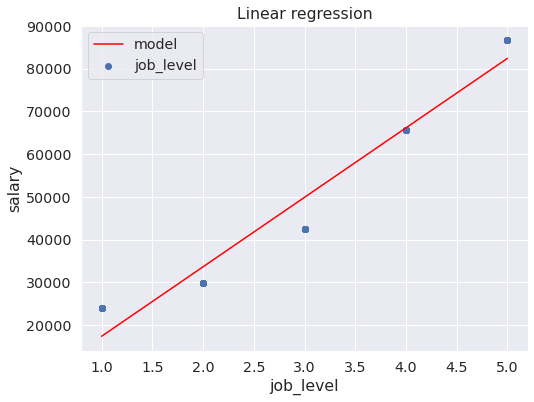

In [98]:
plt.figure(figsize=(8, 6))
plt.title('Linear regression')
plt.xlabel('job_level')
plt.ylabel('salary')
plt.scatter(data1, target1, label='job_level')
plt.plot(data1, target1_pred, color='red', label='model')
plt.legend()
plt.show()

In [99]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')



X_train shape: (375, 1)
X_test shape: (125, 1)
y_train shape: (375, 1)
y_train shape: (375, 1)


[]

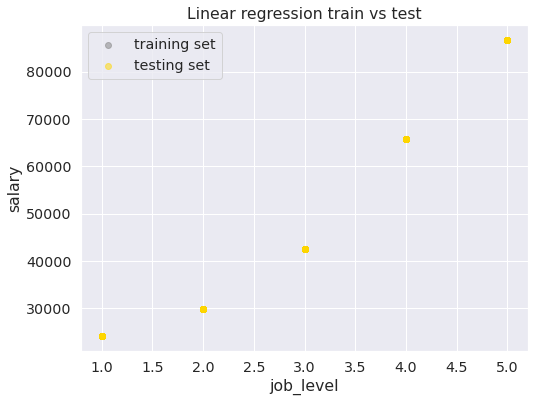

In [100]:
plt.figure(figsize=(8, 6))
plt.title('Linear regression train vs test')
plt.xlabel('job_level')
plt.ylabel('salary')
plt.scatter(X_train, y_train, label='training set', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='testing set', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [101]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:


regressor.score(X_train, y_train)



0.9559031795364984

In [103]:
regressor.score(X_test, y_test)

0.9541797773080579

[]

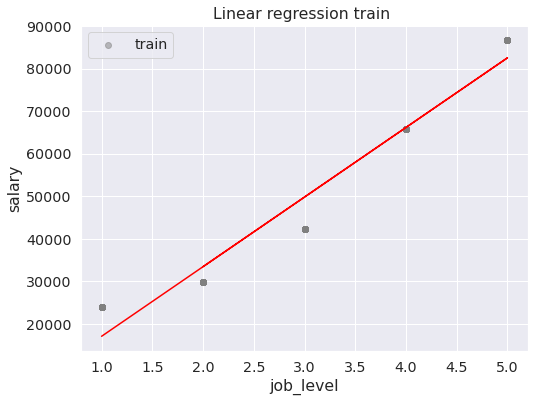

In [104]:
plt.figure(figsize=(8, 6))
plt.title('Linear regression train ')
plt.xlabel('job_level')
plt.ylabel('salary')
plt.scatter(X_train, y_train, label='train', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

data1_poly = poly.fit_transform(data1)
data1_poly

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  5., 25.],
       [ 1.,  5., 25.],
       [ 1.,  5., 25.]])

In [106]:
data1_poly.shape

(500, 3)

In [107]:
regressor_poly = LinearRegression()
regressor_poly.fit(data1_poly, target1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
target1_pred_lin = regressor.predict(data1)

In [109]:
target1_pred_2 = regressor_poly.predict(data1_poly)

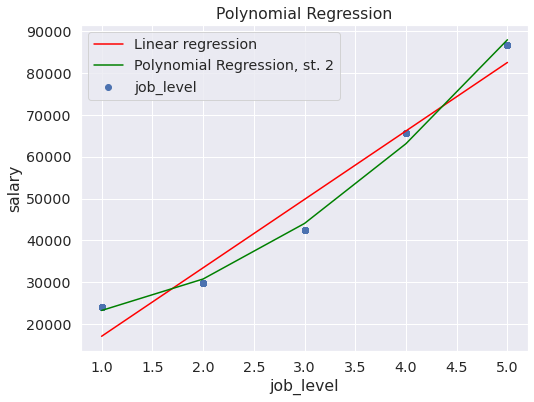

In [110]:
regressor_poly = LinearRegression()
regressor_poly.fit(data1_poly, target1)

target1_pred_2 = regressor_poly.predict(data1_poly)

plt.figure(figsize=(8, 6))
plt.title('Polynomial Regression')
plt.xlabel('job_level')
plt.ylabel('salary')
plt.scatter(data1, target1, label='job_level')
plt.plot(data1, target1_pred_lin, c='red', label='Linear regression')
plt.plot(data1, target1_pred_2, c='green', label='Polynomial Regression, st. 2')
plt.legend()
plt.show()

In [111]:


from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [112]:
target1_pred_lin = regressor.predict(data1)

In [113]:
results = pd.DataFrame(data={
    'name': ['Linear regression', 'Polynomial regression with degree=2'],
    'r2_score': [r2_score(target1, target1_pred_lin), r2_score(target1, target1_pred_2)],
    'mae': [mae(target1, target1_pred_lin), mae(target1, target1_pred_2)],
    'mse': [mse(target1, target1_pred_lin), mse(target1, target1_pred_2)]
        
    })
results

,name,r2_score,mae,mse
0,Linear regression,0.955537,4310.596195,2.486440e+07
1,Polynomial regression with degree=2,0.995433,1452.042777,2.553949e+06


Clustering

In [128]:
X= raw_data.iloc[:, [2,12]].values

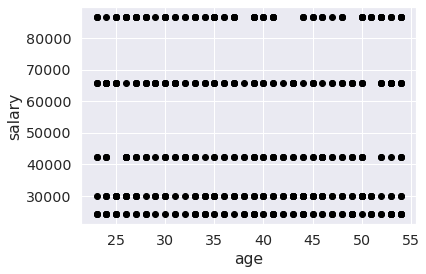

In [129]:
#Visualise data points
plt.scatter(X[:,0],X[:,1],c='black')
plt.xlabel('age')
plt.ylabel('salary')
plt.show()

In [ ]:

from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_



[2 3 1 0 0 3 2 4 3 3 1 0 3 3 2 2 4 1 4 2 0 2 1 2 1 1 1 1 1 0 4 3 4 1 0 2 0
 1 0 0 1 0 3 3 0 2 1 3 2 0 2 4 3 0 1 0 1 0 2 2 2 4 1 2 4 1 0 4 3 4 4 1 0 3
 2 2 4 1 1 2 3 0 3 0 2 0 1 4 4 2 1 3 1 4 4 1 1 4 3 2 2 1 2 4 4 1 1 1 3 2 1
 0 0 4 2 1 0 2 4 3 2 2 3 2 4 4 3 1 0 1 2 0 3 3 0 4 0 2 4 3 0 1 1 2 1 0 0 1
 0 2 4 2 2 0 4 0 3 0 0 0 4 0 4 1 3 4 1 4 4 3 2 2 4 0 1 0 0 4 4 4 4 2 4 2 2
 4 3 1 0 2 1 3 0 0 2 4 3 2 3 4 4 2 4 1 0 2 3 1 2 4 4 4 4 3 1 0 3 3 0 0 4 3
 2 0 0 1 2 2 0 4 1 2 0 2 1 1 3 0 1 3 3 2 2 3 2 1 4 1 3 3 1 2 2 3 0 2 1 2 1
 3 2 1 3 0 1 0 0 4 2 1 0 4 3 1 0 2 4 0 2 0 1 1 1 4 1 2 0 3 2 2 1 4 0 4 0 0
 4 2 0 4 0 3 2 1 0 3 1 1 0 4 0 3 1 0 4 0 2 4 3 1 0 4 2 4 2 3 1 3 0 4 2 2 4
 4 0 3 2 0 3 0 2 4 4 3 1 3 1 0 0 2 1 2 4 1 3 4 4 3 4 1 2 4 1 0 1 2 1 3 2 0
 3 1 2 0 3 0 1 0 4 3 0 1 1 0 1 2 2 2 4 0 4 1 4 1 1 3 2 1 3 2 1 1 4 4 2 1 0
 4 2 1 1 0 2 1 4 0 2 0 4 2 0 3 4 4 4 3 3 1 0 1 0 3 3 1 2 1 0 1 4 0 0 2 3 0
 3 1 4 2 3 0 3 0 3 0 1 0 0 4 0 4 2 4 1 4 2 1 3 3 4 4 2 2 0 2 0 1 4 1 2 1 1
 1 2 1 0 2 1 2 3 0 1 3 3 

array([[3.88909091e+01, 2.98050000e+04],
       [3.76545455e+01, 6.57150000e+04],
       [3.85145631e+01, 8.67500000e+04],
       [3.82317073e+01, 4.24190000e+04],
       [3.98210526e+01, 2.40760000e+04]])

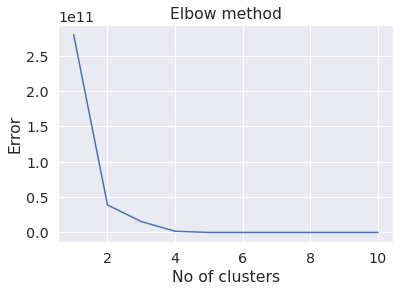

In [ ]:


Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()



In [ ]:
kmeansmodel = KMeans(n_clusters= 4)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

array([[4.62456140e+01, 2.98050000e+04],
       [3.07164179e+01, 6.57150000e+04],
       [4.68627451e+01, 8.67500000e+04],
       [4.56279070e+01, 4.24190000e+04],
       [4.57580645e+01, 2.40760000e+04],
       [3.09811321e+01, 2.98050000e+04],
       [4.84651163e+01, 6.57150000e+04],
       [3.03269231e+01, 8.67500000e+04],
       [3.00769231e+01, 4.24190000e+04],
       [2.86666667e+01, 2.40760000e+04]])

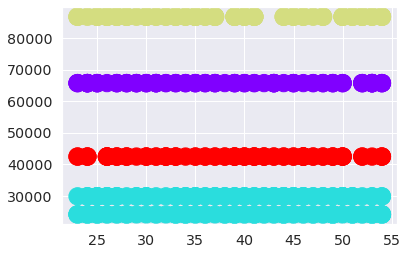

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 300, c = y_kmeans, cmap='rainbow')